# Fetching and Plotting basic weather info

In [18]:
# All the import needed to fetch data from Yahoo api.

import time
import uuid
import urllib
import json
import hmac
import hashlib
from base64 import b64encode

``` Note: following code is referred from ```[here](https://developer.yahoo.com/weather/documentation.html#oauth-python)

## Stroring credentials after creating app on Yahoo weather.

In [19]:
app_id = 'rMtISigh'
consumer_key = 'dj0yJmk9THIyMmNEb1RScGRjJmQ9WVdrOWNrMTBTVk5wWjJnbWNHbzlNQT09JnM9Y29uc3VtZXJzZWNyZXQmc3Y9MCZ4PTRk'
consumer_secret = '9667eb91e98731b510c93f168d11afaf0d8c3b93'

query = {'location': 'bengaluru', 'format': 'json', 'u': 'c'}

url = 'https://weather-ydn-yql.media.yahoo.com/forecastrss'
method = 'GET'
concat = '&'

oauth = {
'oauth_consumer_key': consumer_key,
'oauth_nonce': uuid.uuid4().hex,
'oauth_signature_method': 'HMAC-SHA1',
'oauth_timestamp': str(int(time.time())),
'oauth_version': '1.0'
}


## Preparing credentials

In [20]:
#Prepare signature string (merge all params and SORT them)

merged_params = query.copy()
merged_params.update(oauth)
sorted_params = [k + '=' + urllib.parse.quote(merged_params[k], safe='') for k in sorted(merged_params.keys())]
signature_base_str = method + concat + urllib.parse.quote(url, safe='') + concat + urllib.parse.quote(concat.join(sorted_params), safe='')

#Generate signature

composite_key = urllib.parse.quote(consumer_secret, safe='') + concat
oauth_signature = b64encode(hmac.new(composite_key.encode('utf-8'), signature_base_str.encode('utf-8'), hashlib.sha1).digest())

#Prepare Authorization header

oauth['oauth_signature'] = oauth_signature.decode('utf-8')
auth_header = 'OAuth ' + ', '.join(['{}="{}"'.format(k,v) for k,v in oauth.items()])

## Requesting weather info from the endpoint

In [21]:
url = url + '?' + urllib.parse.urlencode(query)

request = urllib.request.Request(url)
request.headers['Authorization'] = auth_header
print(auth_header)
request.headers['X-Yahoo-App-Id']= app_id

response = json.loads(urllib.request.urlopen(request).read().decode())  # Converting the bytes data to python dict

OAuth oauth_consumer_key="dj0yJmk9THIyMmNEb1RScGRjJmQ9WVdrOWNrMTBTVk5wWjJnbWNHbzlNQT09JnM9Y29uc3VtZXJzZWNyZXQmc3Y9MCZ4PTRk", oauth_nonce="ae8dd89437294bdf929dcf5804d29f90", oauth_signature_method="HMAC-SHA1", oauth_timestamp="1601751579", oauth_version="1.0", oauth_signature="82kiHXSVSS9vJaEEGicc/tGuwO0="


## Setting up Matplot lib to plot the data

In [22]:
# All imports used in plotting the fetched data.

from matplotlib import pyplot as plt
import matplotlib.dates as dates
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib notebook

## Filtering data

In [23]:
low_temp = [int(temp['low']) for temp in response['forecasts']]
high_temp = [int(temp['high']) for temp in response['forecasts']]
forecast_dates = [datetime.fromtimestamp(temp['date']) for temp in response['forecasts']]

### Plotting filtered data

``` Note: Following code is derived from ``` [here](https://matplotlib.org/gallery/ticks_and_spines/centered_ticklabels.html#sphx-glr-gallery-ticks-and-spines-centered-ticklabels-py)

<IPython.core.display.Javascript object>


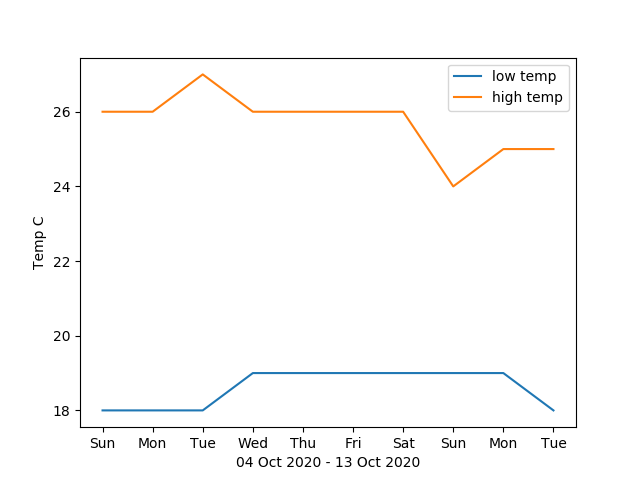

In [24]:
fig, ax = plt.subplots()

ax.plot(forecast_dates, low_temp, label='low temp')
ax.plot(forecast_dates, high_temp, label='high temp')

ax.xaxis.set_major_locator(dates.DayLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%a'))  # %a to show only weeks short form

ax.set_xlabel(forecast_dates[0].strftime('%d %b %Y') +' - '+ forecast_dates[-1].strftime('%d %b %Y'))
ax.set_ylabel('Temp C')
ax.legend()

plt.show()